# We're in Jeopardy..The Gameshow!!

# Index

- [1 Introduction](#1)
- [2 Reading the Data](#2)
- [3 Cleaning the Data](#3)
- [4 Clues in the Question](#4)
- [5 Make mo' Money](#5)
- [6 Top among the Top](#6)
- [7 Top 4](#7)
- [8 So you can't win with data](#8)
- [9 Conclusion](#9)
- [10 Learnings](#10)

# 1

## Introduction

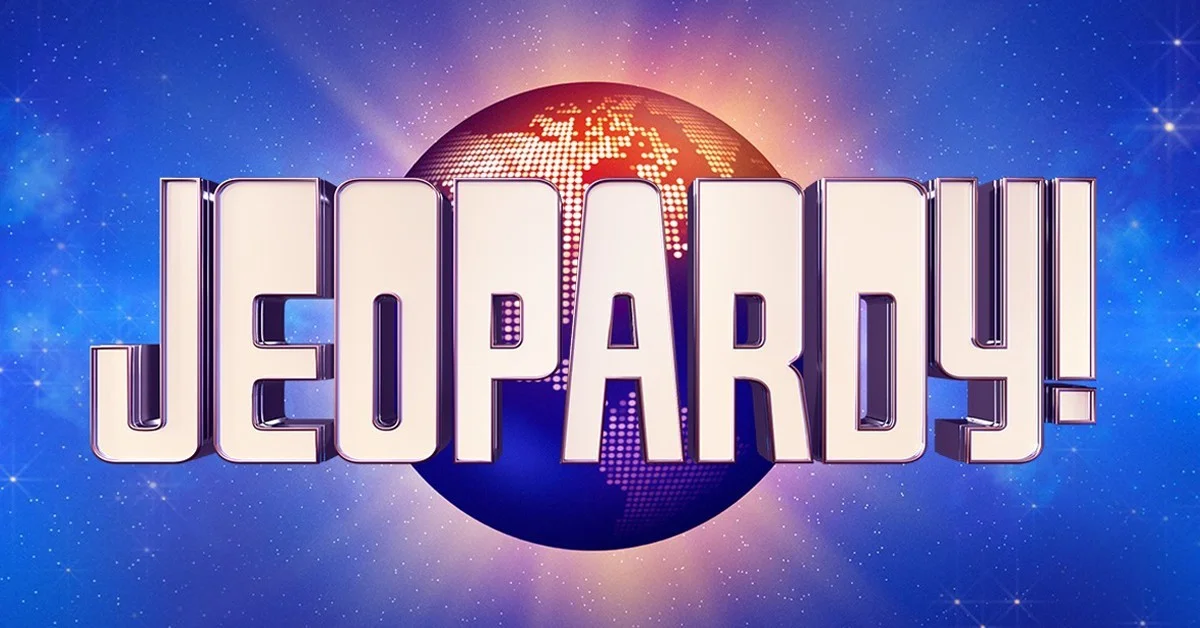
*Source*:[comicbook.com](https://comicbook.com/tv-shows/news/jeopardy-two-new-hosts-mayim-bialik-mike-richards/)

[Jeopardy](https://en.wikipedia.org/wiki/Jeopardy!) is a very popular longstanding US game show. The game has three contestant during every episode. A contestant wins by giving answers to clues whose dollar values depend on how difficult the clues are. The contestant that accrues the most money at the end of an episode wins the episode and moves on to appear in the next episode.

In this project, our goal will be to analyse the entire dataset of questions and answers over the last 38 seasons and attempt to identify the possibility of winning on the show. The hope is that over the last 38 seasons there would be a number of questions and answers that may have repeated multiple times. Using the recycled questions and possibly the terms associated to these questions we should be able to find the most common topics and focus on those to win.

Knowledge of these clues and their answers could give us an advantage over other contestants in winning at Jeopardy if our assumption stands true.

[Index](#Index)

# 2

## Reading the Data

Over the years the show has accrued a large fan following. These fans have gone on to create a website called [J! Archive](https://j-archive.com/) where they have archived every show including the questions, answers and the contestants that participated in an episode.

A reddit user under the pseudonym *trexmatt* has uploaded [more than 200,000 questions in a .csv file](https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file/). The data in the file includes information such as:

- Category: the question category, e.g. "HISTORY"
- Value: \\$ value of the question as string, e.g. "\\$200" (Note: This is "None" for Final Jeopardy! and Tiebreaker questions)
- Question: text of question (contains hyperlinks and other things messy text such as when there's a picture or video question)
- Answer: text of answer
- Round: one of "Jeopardy!","Double Jeopardy!","Final Jeopardy!" or "Tiebreaker" (Note: Tiebreaker questions do happen but they're very rare (like once every 20 years))
- Show_number: string of show number, e.g '4680'
- Air_date: the show air date in format YYYY-MM-DD 

We shall read the data below.

In [1]:
import pandas as pd
jeopardy = pd.read_csv('JEOPARDY_CSV.csv')
jeopardy.head(5)

Show Number    Air Date      Round                         Category  Value  \
0         4680  2004-12-31  Jeopardy!                          HISTORY   $200   
1         4680  2004-12-31  Jeopardy!  ESPN's TOP 10 ALL-TIME ATHLETES   $200   
2         4680  2004-12-31  Jeopardy!      EVERYBODY TALKS ABOUT IT...   $200   
3         4680  2004-12-31  Jeopardy!                 THE COMPANY LINE   $200   
4         4680  2004-12-31  Jeopardy!              EPITAPHS & TRIBUTES   $200   

                                            Question      Answer  
0  For the last 8 years of his life, Galileo was ...  Copernicus  
1  No. 2: 1912 Olympian; football star at Carlisl...  Jim Thorpe  
2  The city of Yuma in this state has a record av...     Arizona  
3  In 1963, live on "The Art Linkletter Show", th...  McDonald's  
4  Signer of the Dec. of Indep., framer of the Co...  John Adams

In [2]:
jeopardy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Show Number  216930 non-null  int64 
 1    Air Date    216930 non-null  object
 2    Round       216930 non-null  object
 3    Category    216930 non-null  object
 4    Value       216930 non-null  object
 5    Question    216930 non-null  object
 6    Answer      216928 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB


[Index](#Index)

# 3

## Cleaning the Data
**Getting the data ready for analysis**

Before we proceed with the analysis of the data. We need to clean up the data. The columns names of the data are preceded by a space which must be removed to ensure that they can be easliy read.

In [3]:
jeopardy.columns=jeopardy.columns.str.strip()
jeopardy.columns

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

The *Question* column simply contains all the questions that have been asked over many episodes. In order to perform our analysis we will be reviewing the count of each word in the *Questions* column and from it attempt to extract what questions or answers are likely to be asked most.

However while counting the words we must remove [stopwords](https://kavita-ganesan.com/what-are-stop-words/#.YWAaAX3hXDd) since their existence in the dataset can significantly affect our analysis. We shall be removing the stopwords in both the *Question* and *Answer* columns.

In [4]:
#Remove non-word and non-number characters in the Question column
jeopardy['clean_question']=jeopardy['Question'].str.lower().str.replace('\W',' ',regex=True).str.split()

In [5]:
#Aggregate English stopwords
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

In [6]:
def rem_stop_words(the_list):
    '''
    Remove stop words from each question in the dataset
    
    Args:
    the_list (list): Question from which to remove stopwords
    
    Returns:
    no_stop_words (list): Question without stop words
    '''
    no_stop_words=[]
    for i in range(len(the_list)):
        if the_list[i] not in en_stops:
            no_stop_words.append(str(the_list[i])) 
    return no_stop_words

In [7]:
#Create the question column without stopwords
jeopardy['ques_rem_stopwords'] = jeopardy['clean_question'].apply(rem_stop_words)
jeopardy['ques_rem_stopwords'].head(5)

0    [last, 8, years, life, galileo, house, arrest,...
1    [2, 1912, olympian, football, star, carlisle, ...
2    [city, yuma, state, record, average, 4, 055, h...
3    [1963, live, art, linkletter, show, company, s...
4    [signer, dec, indep, framer, constitution, mas...
Name: ques_rem_stopwords, dtype: object

In [8]:
#Answer column contains numerical values which need to be converted to string
jeopardy['clean_answer']=jeopardy['Answer'].str.lower().str.replace('\W',' ',regex=True).astype('str')

In [9]:
#Create the answer column without stopwords
jeopardy['ans_rem_stopwords'] = jeopardy['clean_answer'].str.split().apply(rem_stop_words)
jeopardy['ans_rem_stopwords'].head(5)

0     [copernicus]
1    [jim, thorpe]
2        [arizona]
3       [mcdonald]
4    [john, adams]
Name: ans_rem_stopwords, dtype: object

Finally we shall clean the *Value* column to be able to analyse questions based on the price value of the questions. It must be noted that this column does not have data related to values of the [*Final Jeopardy*](https://en.wikipedia.org/wiki/Jeopardy!) round. The value is set by the participant and alloted to his/her earning on answering the question correctly. The dataset has the value for this round set to *None*. In order to ensure that we do not lose this data we shall set this value to 10000 which will help us identify it.

In [10]:
import re
def clean_value(col):
    """
    Convert value from string to int. 
    If the value, fails to be converted to int 
    set the value to 10000 and return the same.
    
    Args:
    col (string): Column to be cleaned
    
    Returns:
    val (int): Value that has been cleaned
    """
    col=col.lower()
    try:
        val=int(re.sub('\W','',col))
    except Exception:
        val=10000
    return val

jeopardy['clean_value']=jeopardy['Value'].apply(clean_value)
jeopardy['Air Date'] = pd.to_datetime(jeopardy['Air Date'])

[Index](#Index)

# 4

## Clues in the Question
**Analysing Question and Answer columns for repeated questions**

In order to get an upper hand in the game we need to figure out which clues and their relative answers have previously appeared in the game. This should help us figure out which topics are more frequent and therefore focus on those topics.

We can figure this out by assessing two questions:
- How often are clues repeated?
- How often an answer appears in the clues?

We shall begin by analysing how often clues are recycled.

In [11]:
question_overlap=[]
terms_used=set()
jeopardy.sort_values('Air Date',inplace=True)

In [12]:
for each_row in jeopardy['ques_rem_stopwords']:
    for word in each_row:
        match_count=0
        if word in terms_used:
            match_count+=1
        terms_used.add(word)
        
    if len(each_row)>0:
        match_count=match_count/len(each_row)
    question_overlap.append(match_count)
jeopardy['question_overlap']=question_overlap

In [13]:
recycled_clues=round((jeopardy[jeopardy['question_overlap']==1].shape[0]/jeopardy['question_overlap'].shape[0])*100,1)
print('\033[1mPercentage of clues that have been recycled: {}%'.format(recycled_clues))

Percentage of clues that have been recycled: 0.6%


In [14]:
print("\033[1mSome clues flagged as repeated:")
jeopardy[jeopardy['question_overlap']==1][['Category','Value','Question','Answer']].head(8)

Some clues flagged as repeated:


Category Value                         Question  \
141320            STARTS WITH "B"  $300                  To give by will   
196198  PRESIDENTIAL MIDDLE NAMES  $400                           Howard   
20800              7-LETTER WORDS  $200             Not one or the other   
124537               LEAD SINGERS  $100                          Genesis   
124543               LEAD SINGERS  $200                       The Police   
124549               LEAD SINGERS  $300                            Wham!   
177908               GRAY MATTERS  $100  "She ain't what she used to be"   
75267           MOVIE TITLE ROLES  $200                     "Barbarella"   

                   Answer  
141320           bequeath  
196198               Taft  
20800             neither  
124537       Phil Collins  
124543              Sting  
124549     George Michael  
177908  the Old Gray Mare  
75267          Jane Fonda

In [15]:
print("\033[1mDeeper look at repeated clues:")
jeopardy[(jeopardy['Question']=='Wham!')|(jeopardy['Question']=='Genesis')|(jeopardy['Question']=='To give by will')][['Air Date','Category','Value','Question','Answer']].head(8)

Deeper look at repeated clues:


Air Date                      Category Value         Question  \
141320 1984-12-07               STARTS WITH "B"  $300  To give by will   
124537 1987-02-16                  LEAD SINGERS  $100          Genesis   
124549 1987-02-16                  LEAD SINGERS  $300            Wham!   
153116 2008-02-07                         SING!  $200            Wham!   
9351   2011-07-13  THE NEXT BIBLE BOOK AFTER...  $400          Genesis   

                Answer  
141320        bequeath  
124537    Phil Collins  
124549  George Michael  
153116  George Michael  
9351            Exodus

**Analysis**
- We have identified that only **0.6% of the clues have been repeated.** This percentage is likely to decrease even more considering that some of the questions that have been flagged as recycled have only appeared as such because of the removal of the stopwords. An example of the same can be seen above. The *Question*, *To give by will* seems to appear only once but it may have been flagged as a repeat because one or more of the words in the *Question* were not flagged as stopwords and those words existed in some other question.

- Another interesting point of analysis is that **some of the questions require context which is provided by the *Category*.** An example of this is the question *Genesis*. Further the same *Question* can have related categories with slightly different contexts. This is highlighted by the *Question* *Wham!*

- Clearly recycled clues provide little support in giving us an upper hand. It would be **futile chasing this endeavour.** However, it must be noted that the Category column seems to provide some clue of what topics could be studied. We shall analyze how the *Category* column could help us in our endeavour later.

Next we shall analyse how often the clue or question itself has some hints to the answer. The idea here is to find out how often the question itself has the answer or some very close hints that relate to the answer. We shall be checking this by looking out for instances where part of the answer or the answer itself is in the clue or question.

In [16]:
def process_row(a_row):
    """
    Calculate relative frequency of each word 
    in the answer in the question
    
    Args:
    a_row (series): Column to be cleaned
    
    Returns:
    (float): relative frequecy of all words, in the answer, in the question
    """
    split_answer = a_row['ans_rem_stopwords']
    split_question = a_row['ques_rem_stopwords']
    match_count = 0
    if len(split_answer) == 0:
        return 0
    else:
        for each_word in split_answer:
            n=0
            if each_word in split_question:
                match_count+=1
        return match_count/len(split_answer)

In [17]:
jeopardy['answer_in_question'] = jeopardy.apply(process_row,axis=1)

In [18]:
exact_answer_in_question=round((jeopardy[jeopardy['answer_in_question']>0].shape[0]/jeopardy.shape[0])*100,1)
print('\033[1mPercentage of clues with some part of the answer in them: {}%'.format(exact_answer_in_question))

Percentage of clues with some part of the answer in them: 7.9%


In [19]:
print("\033[1mExamples of clues with some part of the answer in them:")
jeopardy[jeopardy['answer_in_question']==1][['Category','Value','Question','Answer']].head(10)

Examples of clues with some part of the answer in them:


Category   Value  \
210202          MYSTERIES    $200   
210223            GRAMMAR    $200   
46370    AMERICAN INDIANS    $600   
149213            GRAMMAR    $400   
129754      WEST VIRGINIA  $1,500   
129717           PRIMATES    $200   
123865      NEIGHBORHOODS    $400   
123837            ZOOLOGY    $200   
196187  CELEBRITY SAYINGS    $200   
67275              POLAND    $300   

                                                 Question  \
210202  1st cousins Dannay & Lee wrote the Ellery Quee...   
210223                         The adverb in "think fast"   
46370   To keep Indians out, Dutch settlers built a wa...   
149213  The interjection in "Whew! This is a tough ans...   
129754  Not until 1939 did West Virginia pay off its 6...   
129717  Old world monkeys are both arboreal & ground-d...   
123865  Of a North, East, South & West Side, the 1 Chi...   
123837  Of a rat, a raven, & a spineless jellyfish the...   
196187  Completes Mae West line, "It's not the men in ...   
67275   Of 1 out of 5, 1 out of 15, or 1 out of 50, ap...   

                         Answer  
210202             Ellery Queen  
210223                     fast  
46370               Wall Street  
149213                     whew  
129754                 Virginia  
129717                 arboreal  
123865                     East  
123837                    raven  
196187  it's the life in my men  
67275               1 out of 50

**Analysis**
- **7.9% of the clues have some part of the answer in them**. However, it must be noted that this number is significantly small when considering that there are more than 200,000 questions.
- Many of the questions or clues with the answers in them are actually options. The options themselves do not make sense without the category names providing the context.
- Clearly looking out for clues of the answer in the question may not be a worthwhile endeavour. However just like before this analysis has revealed that taking a look at the *Category* might be helpful.

[Index](#Index)

# 5

## Make mo' Money
**Analysing whether high value questions are associated to specific words**

While we have failed to come up with a set of question that could give us an upperhand in the game of Jeopardy. We could possibly come with a smaller set of questions or clues with higher values that may help us in gaining an upper hand. If we can find out what words commonly appear in questions with huge monetary value we should be able to focus on those questions and get out of the game with a significant cash prize.

In order to find out what terms commonly appear in high value questions we need to compute the [chi squared value](https://www.statisticshowto.com/probability-and-statistics/chi-square/) of the individually identified terms and then aggregate the terms with the most chi squared values. This should help us with identifying what topics are covered most in high value questions. We consider high value questions or clues that are valued at more than \\$800. We shall have to identify the number of high value and low value questions.

In [20]:
def identify_high_price(value):
    """
    Classify values greater and less 
    than 800 as 1 or 0 respectively.
    
    Args:
    value (int): Value to be classified
    
    Returns:
    (int): 1 or 0 to identify the classification
    """
    if value > 800:
        return 1
    else:
        return 0
jeopardy['high_value'] = jeopardy['clean_value'].apply(identify_high_price)

In [21]:
print('High value questions: \033[1m{}\033[0m \n'.format(jeopardy['high_value'].value_counts()[1]))
print('Low value questions: \033[1m{}\033[0m \n'.format(jeopardy['high_value'].value_counts()[0]))
print('Terms that are not stopwords in the dataset: \033[1m{}\033[0m \n'.format(len(terms_used)))

High value questions: 65056 

Low value questions: 151874 

Terms that are not stopwords in the dataset: 90402 



Calculating the chi-square value for 90,402 terms over a dataset that contains more than 200,000 questions is a formidable task given the resources at hand and the time it will take. We shall have to abandon this endeavour.

Instead we shall attempt to find the chi-square values of the 30 most popular terms in the questions and find out how often these terms appear in high value question.

[Index](#Index)

# 6

## The Top among the Top
**Identifying the most popular words in the high value questions**

We shall first identify the 30 most common terms in the *Questions* column of the dataset.

In [22]:
#Most commonly used words in the set
ques_words_count={}
for each_row in jeopardy['ques_rem_stopwords']:
    for word in each_row:
        if word in ques_words_count:
            ques_words_count[word]+=1
        else:
            ques_words_count[word]=1
ques_words_count=pd.Series(ques_words_count)
comparison_terms=ques_words_count.sort_values(ascending=False).head(30)
print('\033[1m30 Most common terms in \033[4mall questions and their occurences:')
comparison_terms

30 Most common terms in all questions and their occurences:


one        13568
j          13539
com        13169
media      13025
www        13006
archive    12979
http       12971
href       12967
name       11327
target     10717
_blank     10649
jpg        10613
first      10274
2           7757
city        7471
country     6045
named       5881
u           5848
man         5715
called      5487
state       5403
like        5340
seen        5275
clue        4985
new         4964
film        4811
type        4709
3           4428
1           4348
word        4286
dtype: int64

Many of the **questions involved have references to video and image links** on the [J Archive](https://j-archive.com/) website. This has **caused words appearing in those links to have significant prevalence.** We shall therefore ignore the first 15 most popular words and focus on the remaining 15 words for their prevalence in high value questions.

In [23]:
comparison_terms=comparison_terms[14:]

In [24]:
def term_count(word):
    """
    Counts the number of times a term appears 
    in high value and low value questions
    
    Args:
    word (string): The word whose count must be verified
    
    Returns:
    high_count (int): Number of times the word appears in high value questions
    low_count (int): Number of times the word appears in low value questions
    """
    high_count=0
    low_count=0
    for index,each_question in jeopardy[['ques_rem_stopwords','high_value']].iterrows():
        split_ques=each_question['ques_rem_stopwords']
        if word in split_ques:
            if each_question['high_value']==1:
                high_count+=1
            else:
                low_count+=1
    return low_count,high_count

In [25]:
observed_expected=[]
for each_term in comparison_terms.index:
    observed_expected.append(term_count(each_term))

In [26]:
print('\033[1m\033[4mFrquency of most popular terms in low and high value questions\033[0m')
from prettytable import PrettyTable
x = PrettyTable(['Term','Frequency in Low Value Questions','Frequency in High Value Questions'])
for i in range(len(observed_expected)):
    new_list=[]
    new_list.append(comparison_terms.index[i])
    new_list.append(observed_expected[i][0])
    new_list.append(observed_expected[i][1])
    x.add_row(new_list)
print(x)

Frquency of most popular terms in low and high value questions
+---------+----------------------------------+-----------------------------------+
|   Term  | Frequency in Low Value Questions | Frequency in High Value Questions |
+---------+----------------------------------+-----------------------------------+
|   city  |               5074               |                2162               |
| country |               4193               |                1786               |
|  named  |               3705               |                2093               |
|    u    |               3933               |                1749               |
|   man   |               3704               |                1868               |
|  called |               3622               |                1799               |
|  state  |               3667               |                1457               |
|   like  |               3486               |                1677               |
|   seen  |             

Now that we have the frequency of the most common words in the *Questions* column we should be able to calculate the chi-square value and the P-value.

In [27]:
from scipy.stats import chisquare
import numpy as np
high_value_count = jeopardy['high_value'].value_counts()[1]
low_value_count = jeopardy['high_value'].value_counts()[0]
chi_squared = []
for each_list in observed_expected:
    total=np.sum(each_list)
    total_prop=total/jeopardy.shape[0]
    exp_high=total_prop*high_value_count
    exp_low=total_prop*low_value_count
    
    expected=np.array([exp_low,exp_high])
    observed=np.array([each_list[0],each_list[1]])
    chi_squared.append(chisquare(observed,expected))

In [28]:
print('\033[1m\033[4mChi-Square and P-value of common terms\033[0m')
from prettytable import PrettyTable
x = PrettyTable(['Term','Chi-Square','p-value'])
for i in range(len(observed_expected)):
    new_list=[]
    new_list.append(comparison_terms.index[i])
    new_list.append(round(chi_squared[i][0],2))
    new_list.append(chi_squared[i][1])
    x.add_row(new_list)
print(x)

Chi-Square and P-value of common terms
+---------+------------+-------------------------+
|   Term  | Chi-Square |         p-value         |
+---------+------------+-------------------------+
|   city  |    0.04    |    0.8367224072264046   |
| country |    0.04    |    0.8419235942413075   |
|  named  |   103.07   |  3.2385433684803644e-24 |
|    u    |    1.7     |   0.19260016975775987   |
|   man   |   33.17    |  8.443131337907766e-09  |
|  called |   26.38    |  2.8056271625388544e-07 |
|  state  |    5.9     |   0.015158148236915319  |
|   like  |   15.27    |  9.330739928324031e-05  |
|   seen  |   35.71    |  2.284316208778485e-09  |
|   clue  |   665.02   | 1.2068908867244617e-146 |
|   new   |    3.57    |   0.05884800147218117   |
|   film  |    4.32    |   0.037661192462168994  |
|   type  |   10.85    |  0.0009867534366228444  |
|    3    |   18.16    |  2.0351740008437447e-05 |
|    1    |    3.52    |   0.060797582476251825  |
|   word  |   153.38   |  3.171169328821347

Based on the Chi-Squared test many of the most common terms have a great difference in usage between high and low value questions. The word or term *clue* seems to be quite common in clues or questions with high values. We shall assess the top four terms individually and the reason why they may be common among high value questions.

[Index](#Index)

# 7

## Top 4
**Analysing the top 4 most represented words in high value questions**

### Analysing the word *clue*

The first word with the most representation is the word or term *clue*. We shall analyse the reason behind it significant presence.

In [29]:
clue_set=jeopardy[(jeopardy['high_value']==1)& (jeopardy['Question'].str.contains('clue'))][['Round','Category','Value','Question','Answer']]
clue_set.head(6)

Round            Category   Value  \
29502          Jeopardy!    DAYS OF THE WEEK    $900   
93539   Double Jeopardy!  RICHARD GERE FILMS  $1,000   
115967  Double Jeopardy!             ENDINGS  $3,600   
65389   Double Jeopardy!        FAMOUS PAIRS  $1,200   
176428         Jeopardy!       SCI-FI SIRENS  $1,000   
150527  Double Jeopardy!         MOVIE MUSIC  $1,000   

                                                 Question  \
29502   Day of the week in the title of the following:...   
93539   (VIDEO DAILY DOUBLE): (Alex:  Take a look at t...   
115967  Ending being celebrated in the Alfred Eisensta...   
65389   In early 1996 they celebrated their 15,000th l...   
176428  TV character seen here, she made the cover of ...   
150527  1968 Oscar winner for special visual effects t...   

                                           Answer  
29502                 Tuesday (Tuesday Afternoon)  
93539               Sir Lancelot ("First Knight")  
115967                End of the Second World War  
65389                             Siegfried & Roy  
176428                                       Xena  
150527  2001: A Space Odyssey ("The Blue Danube")

In [30]:
clue_set['Round'].value_counts()

Double Jeopardy!    373
Jeopardy!           108
Final Jeopardy!       3
Name: Round, dtype: int64

The word *clue* has significant appearence in the dataset because of the [*Clue Crew*](https://www.jeopardy.com/about/clue-crew) of jeopardy. The crew consisted of correspondents who appeared in videos created to give clues. Questions or clues that involved the *Clue Crew* seem to appear in the dataset especially for double jeopardy questions. This seems to be the reason behind the prevalence of the word *clue* in these questions. More details about the *Clue Crew* are available in [this article](https://www.cinemablend.com/television/2561295/how-the-lovely-alex-trebek-tribute-during-his-final-jeopardy-episode-connects-to-the-clue-crew).

### Analysing the word *word*

The next word we shall analyse is *word*.

In [31]:
word_set=jeopardy[(jeopardy['high_value']==1)& (jeopardy['Question'].str.contains('word'))][['Round','Category','Value','Question','Answer']]
word_set.head(6)

Round        Category   Value  \
84564   Double Jeopardy!  4-LETTER WORDS  $1,000   
137442  Double Jeopardy!        RELIGION   $1000   
149226  Double Jeopardy!         GRAMMAR   $1000   
108717  Double Jeopardy!      LITERATURE  $1,000   
172409  Double Jeopardy!    STATE MOTTOS   $1000   
100457  Double Jeopardy!          “GUT”s   $1000   

                                                 Question          Answer  
84564   It's the first 4-letter word in "The Star Span...            what  
137442  This word for the Mohammedan religion means "s...           Islam  
149226  The word, phrase or clause a pronoun must agre...  the antecedent  
108717  Vowel missing from entire 50,000 word text of ...               E  
172409  His words became North Dakota motto, “Liberty ...  Daniel Webster  
100457  Botanical name for “plant sweat”, from Latin w...       guttation

In [32]:
word_set['Round'].value_counts()

Double Jeopardy!    1384
Jeopardy!            405
Final Jeopardy!      179
Name: Round, dtype: int64

In [33]:
word_set['Category'].value_counts().head(10)

WORD ORIGINS               52
VOCABULARY                 20
IN THE DICTIONARY          15
FROM THE GREEK             12
SHAKESPEARE                11
WORD & PHRASE ORIGINS      10
FOREIGN WORDS & PHRASES     9
10-LETTER WORDS             8
4-LETTER WORDS              7
QUOTATIONS                  7
Name: Category, dtype: int64

*word* appears in word related clues or questions. *Word Origins* seems to be the most popular category for clues associated to *word*. Knowledge of words and phrases especially in English could be a topic of focus for study that helps in answering high values questions.

### Analysing the word *named*

In [34]:
named_set=jeopardy[(jeopardy['high_value']==1)& (jeopardy['Question'].str.contains('named'))][['Round','Category','Value','Question','Answer']]
named_set.head(5)

Round           Category   Value  \
70471   Double Jeopardy!      THE CIVIL WAR   $1000   
23200    Final Jeopardy!   THE SOLAR SYSTEM    None   
26180    Final Jeopardy!       THE CALENDAR    None   
134220  Double Jeopardy!   SPORTS NICKNAMES   $1000   
134208  Double Jeopardy!  HIGHWAYS & BYWAYS  $1,200   

                                                 Question  \
70471   General Nicknamed "Uncle Billy" who believed i...   
23200   Only 1 of 9 planets not named for a Greek or R...   
26180      The only day of the week named for a Roman god   
134220  9-man teams nearly always lose to softball pit...   
134208  Peace, Hope & Friendship are streets in this s...   

                            Answer  
70471   (William Tecumseh) Sherman  
23200                    the Earth  
26180                     Saturday  
134220      The King and his Court  
134208    Providence, Rhode Island

In [35]:
named_set['Round'].value_counts()

Double Jeopardy!    1498
Jeopardy!            465
Final Jeopardy!      186
Name: Round, dtype: int64

In [36]:
named_set['Category'].value_counts().head(10)

U.S. CITIES                19
STATE CAPITALS             12
SCIENTISTS                 10
EXPLORERS                   9
AWARDS                      8
COLLEGES & UNIVERSITIES     8
THE ELEMENTS                7
SCIENCE                     7
AMERICANA                   7
WORD ORIGINS                7
Name: Category, dtype: int64

The word is associated to clues about names including names of U.S cities, state capitals, notable personalities etc. Geographical knowledge specifically related to the U.S  should help to answer some of the high value questions as the categories that involve this word include U.S cities, state capitals and Americana. It must be noted however that state capitals could include those of other countries and are not limited to just the U.S.

### Analysing the word *like*

In [37]:
like_set=jeopardy[(jeopardy['high_value']==1)& (jeopardy['Question'].str.contains('like'))][['Round','Category','Value','Question','Answer']]
like_set.head(5)

Round         Category  Value  \
5030    Double Jeopardy!  BRITISH HISTORY  $1000   
5028    Double Jeopardy!            TREES  $1000   
191447  Double Jeopardy!          PHYSICS  $1000   
134219  Double Jeopardy!         THE ‘60s  $1000   
2854    Double Jeopardy!          INSECTS  $1000   

                                                 Question              Answer  
5030    Though it sounds like a grim volume, it's just...   The Domesday Book  
5028    Hindu for “trader” this unusual tree whose bra...              Banyan  
191447  Branch of physics dealing with motion, like th...            kinetics  
134219  Unlikely site of 1967 meeting between pres. Jo...           Glassboro  
2854    Largest North American wasp, it hunts tarantul...  the tarantula hawk

In [38]:
like_set['Round'].value_counts()

Double Jeopardy!    1312
Jeopardy!            390
Final Jeopardy!       43
Name: Round, dtype: int64

In [39]:
like_set['Category'].value_counts().head(10)

ART                     9
SCIENCE                 6
LITERARY TERMS          5
POETS & POETRY          5
HOMOPHONES              4
5-LETTER WORDS          4
QUOTATIONS              4
3-LETTER WORDS          4
FOOD WORDS & PHRASES    4
WOMEN AUTHORS           3
Name: Category, dtype: int64

This word seems to be almost evenly spread across high value question. However, given the categories that the word appears in it is still safe to say that a wordsmith should be able to manage many of the questions with ease.

[Index](#Index)

# 8

## So you can't win with data?

Our goal, through the process of data analysis was to identify whether we could win in Jeopardy by analysing questions and answers that may have been recycled over the last 38 seasons. Through our analysis we found that questions are rarely recycled and attempting to prepare based on the same may prove to be futile especially since the questions depend on the category for analysis.

We also identified that categories while named differently can have almost the same context, if not entirely. So we were not able to lockdown on categories either.

The big question is, is it possible to win using the existing data from Jeopardy? **The answer is Yes!** [Roger Craig](https://en.wikipedia.org/wiki/Roger_Craig_(Jeopardy!_contestant) an American Computer Scientist managed to do this and has provided some [explanation](https://vimeo.com/29001512) on the same.

[Index](#Index)

# 9

## Conclusion

Jeopardy is a long standing popular American TV show. In this project we attempted to find out whether we could attempt to win the show by analysing recycled questions given that the show has been running for 38 seasons. We also attempted to analyse popular terms in the questions or clues for hints of topics we can focus on to get an upper hand in the game.

After analysing the data we found the looking out for recycled questions or answers is a futile exercise as both depend on the Categories to provide context to them. In addition Categories themselves while different are sometimes related to each other. Given the hardware and time constraints in hand we also failed to come up with all the terms associated to high valued questions but we were able to identify how well some of the most common terms are associated to high value questions. 

Through this process we were able to find out some topics that we could focus on that may give us an upperhand in winning Jeopardy. It must be noted that winning in the game through data analysis is possible as the same has been done by Roger Craig.

As he mentions,"*...its not so much the probability that you studied a question and it comes up....its the probability that it comes up and you studied it, thats whats important!*"

[Index](#Index)

# 10

## Learnings

- [Stopwords](https://www.ranks.nl/stopwords)
- [Sorting a dictionary](https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value)
- [Tabular printing](https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data)
- [Plotting with Seaborn](https://www.python-graph-gallery.com/bubble-plot-with-seaborn)
- https://www.tutorialspoint.com/python_text_processing/python_remove_stopwords.htm
- https://www.codespeedy.com/proper-noun-extraction-in-python-using-nlp-in-python/

[Index](#Index)